# Bank Marketing Analysis

## Introduction

This project is aimed at analyzing data from a bank marketing technique for a particular period to determine hoe effective the marketing is.

### Data Key

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - balance: balance od the customer

17 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## Basic Data Exploration and Analysis

In [85]:
#imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [86]:
# preview data
bank = pd.read_csv("/Users/DaydreamPictures/Documents/Ustacky Project/Personal works/Datasets/bank.csv")

In [87]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [88]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [89]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


### Categorical Data Count/Analysis

In [90]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

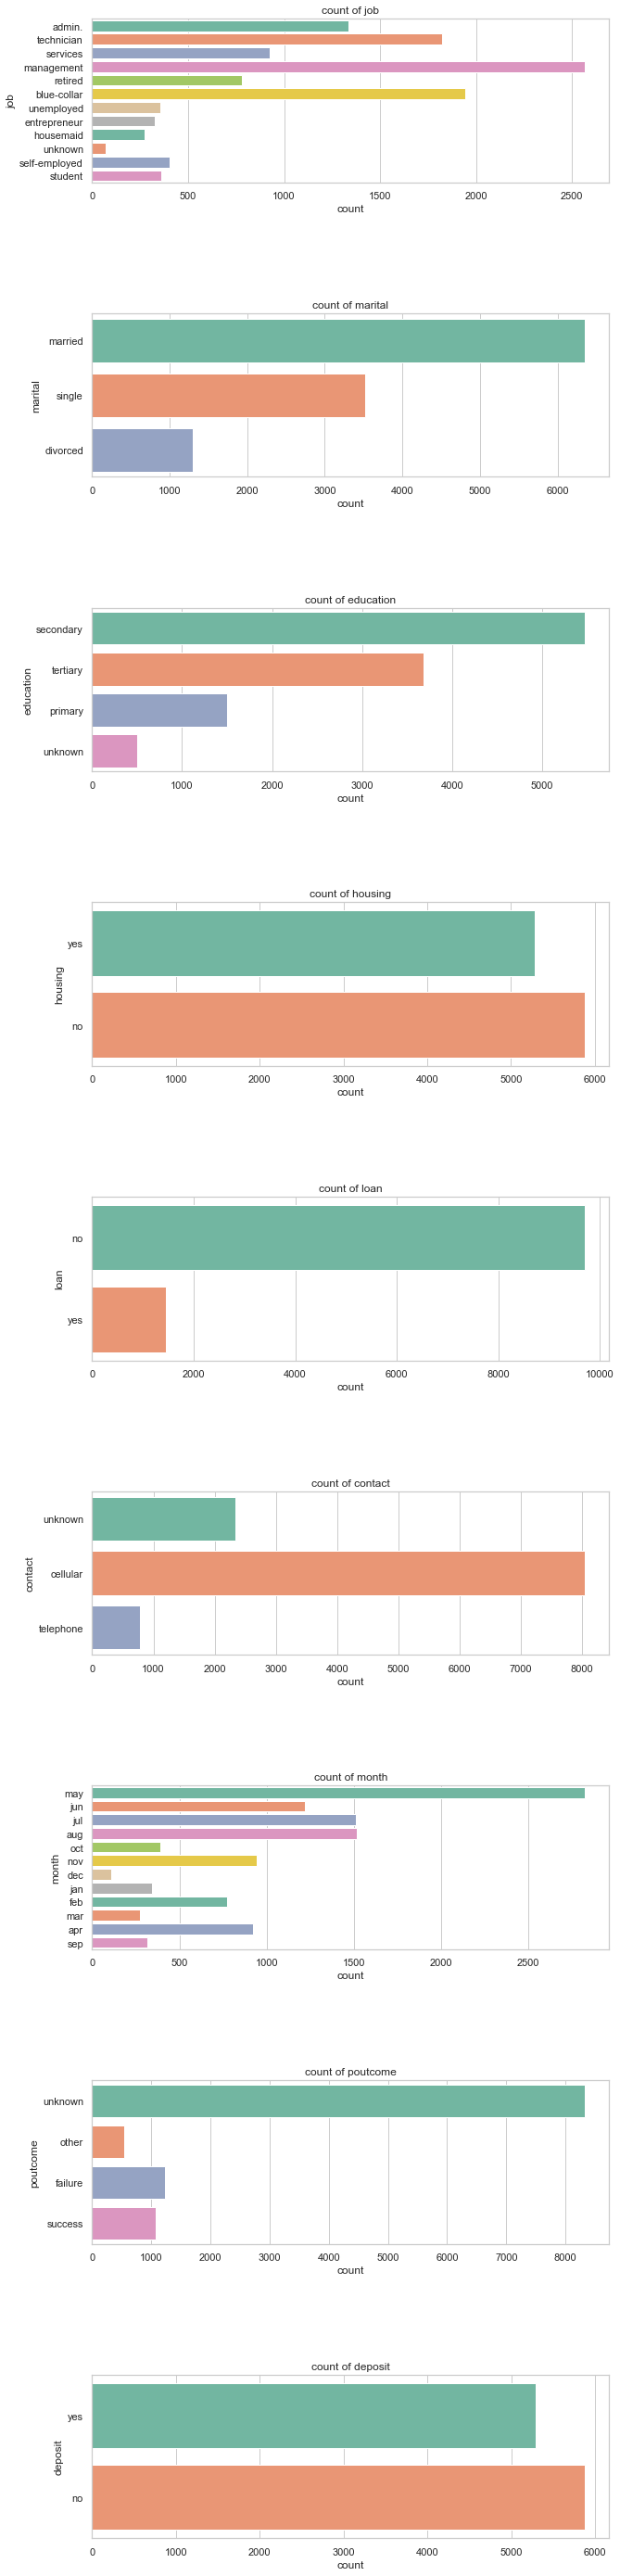

In [92]:
# plot map of categorical data count
cols = ["job", "marital", "education", "housing", "loan", "contact", "month", "poutcome", "deposit"]

sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(nrows=9, ncols=1, figsize=(10, 50))
fig.subplots_adjust(hspace=.8)
#fig.suptitle('Countplot for categorical variables', fontsize = 30)

for i, cols in enumerate(cols):
    sns.countplot(y = cols, data = bank, ax = ax[i], palette = "Set2")
    ax[i].set_title('count of {}'.format(cols))
    #sns.despine()

### Map Binary Variables

In [93]:
bi_cols = ["default", "housing", "loan", "deposit"]
dict = {"yes" : 1, "no" : 0}

for coll in bi_cols:
    bi = bank[coll].map(dict)
    bank[coll] = bi

In [94]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1


### Numerical Data Distribution

In [95]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

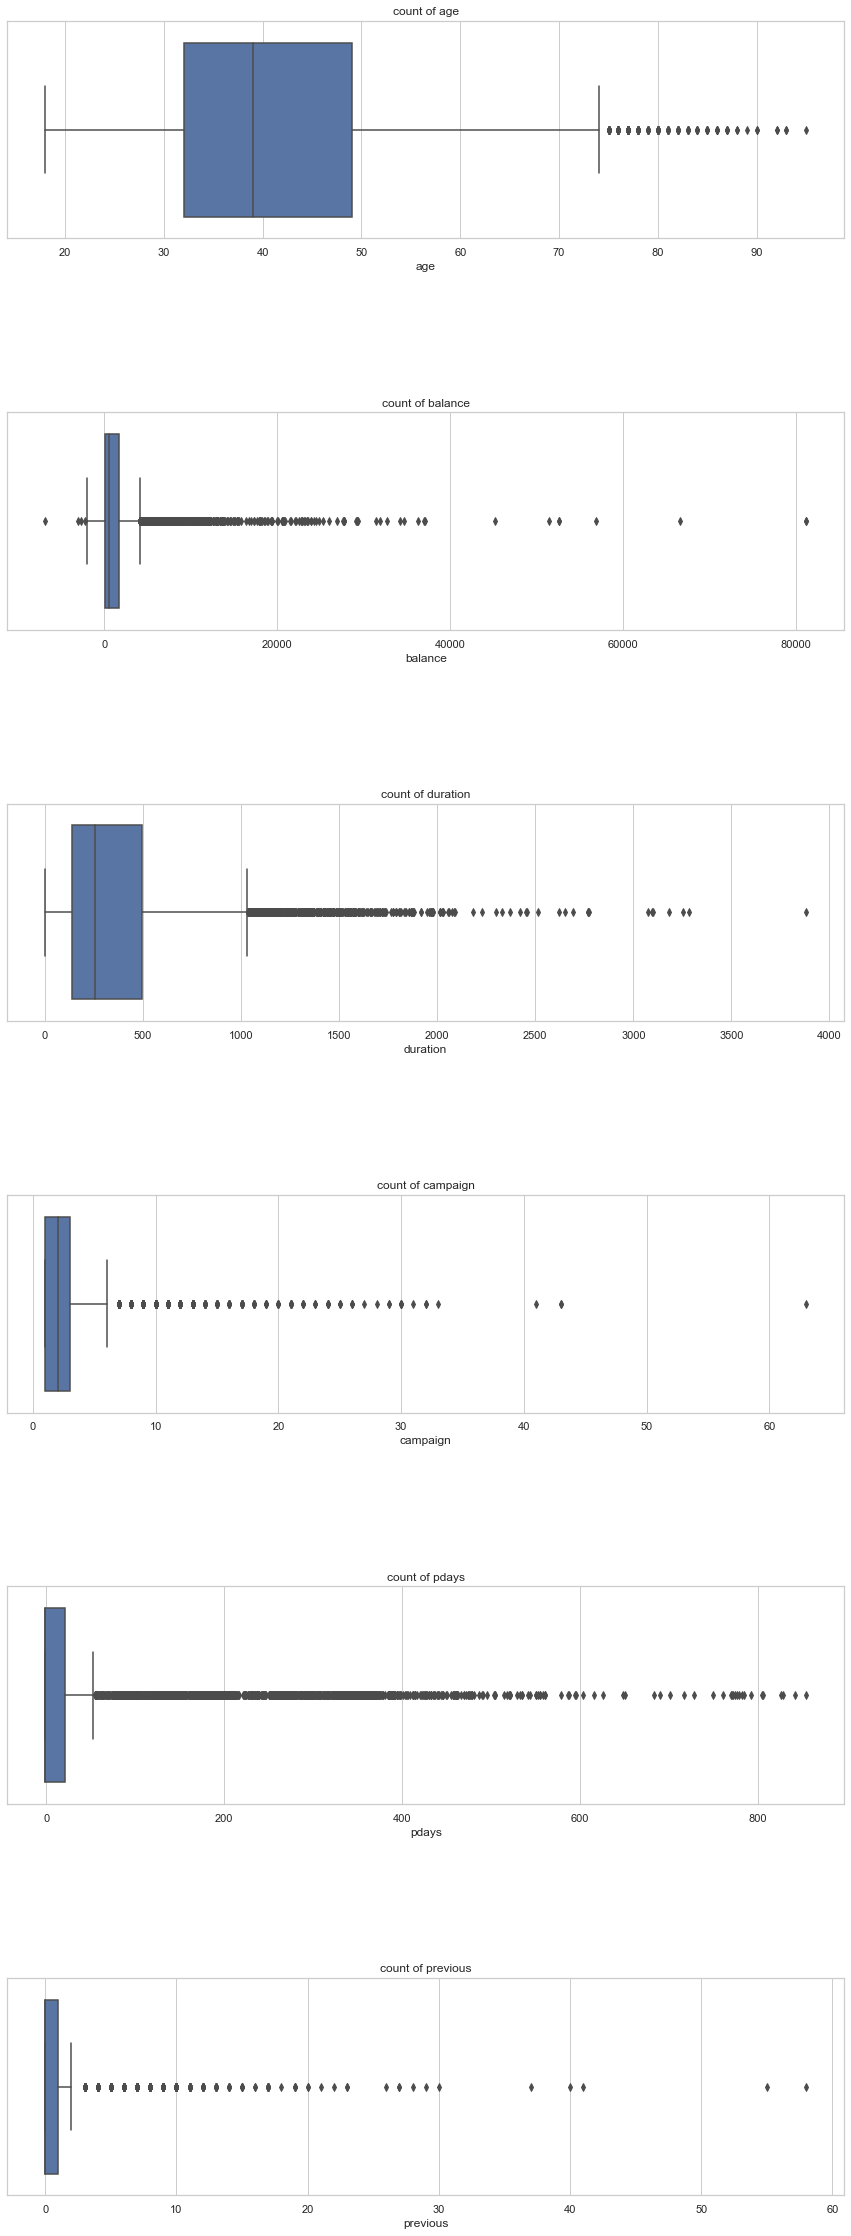

In [96]:
num_data = ["age", "balance", "duration", "campaign", "pdays", "previous"]

sns.set_theme(style="whitegrid")


fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(15, 40))
fig.subplots_adjust(hspace=.8)
#fig.suptitle('Countplot for categorical variables', fontsize = 30)

for i, cool in enumerate(num_data):
    sns.boxplot(x= bank[cool], ax = ax[i])
    #p.figure(figsize= (10, 20))
    ax[i].set_title('count of {}'.format(cool))
   

For the fun of it, Let's look at the numerical data distribution in a histogram plot

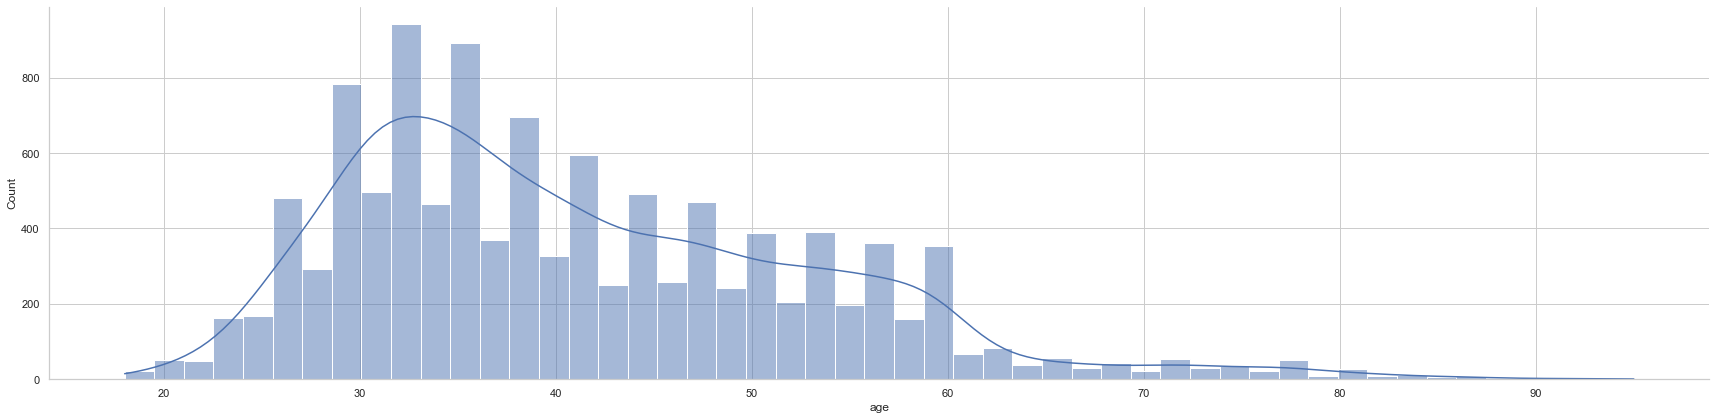

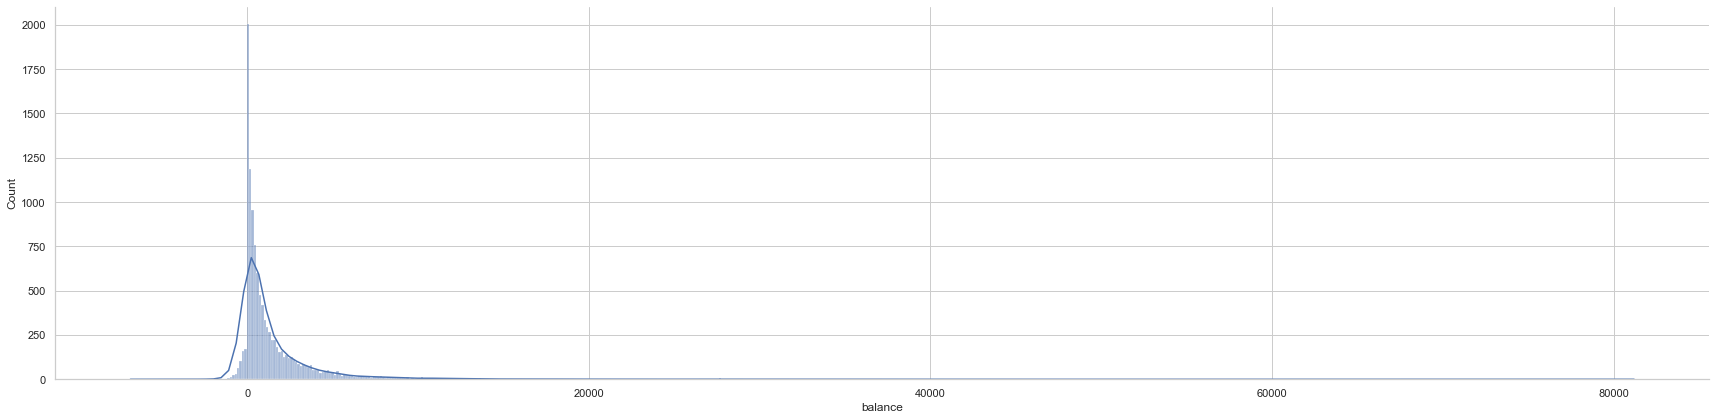

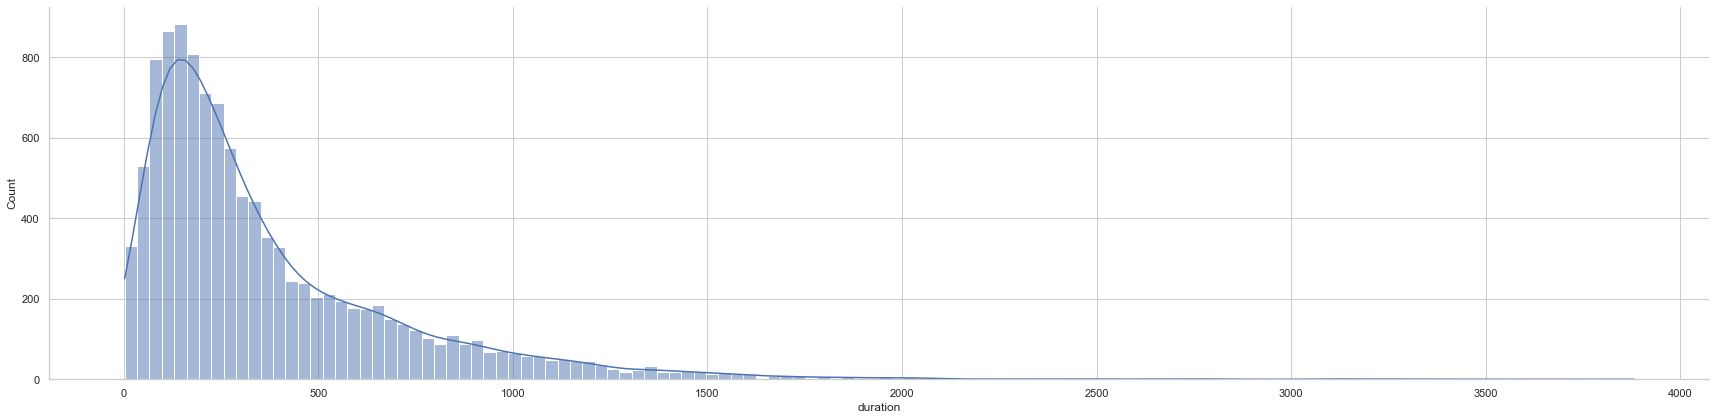

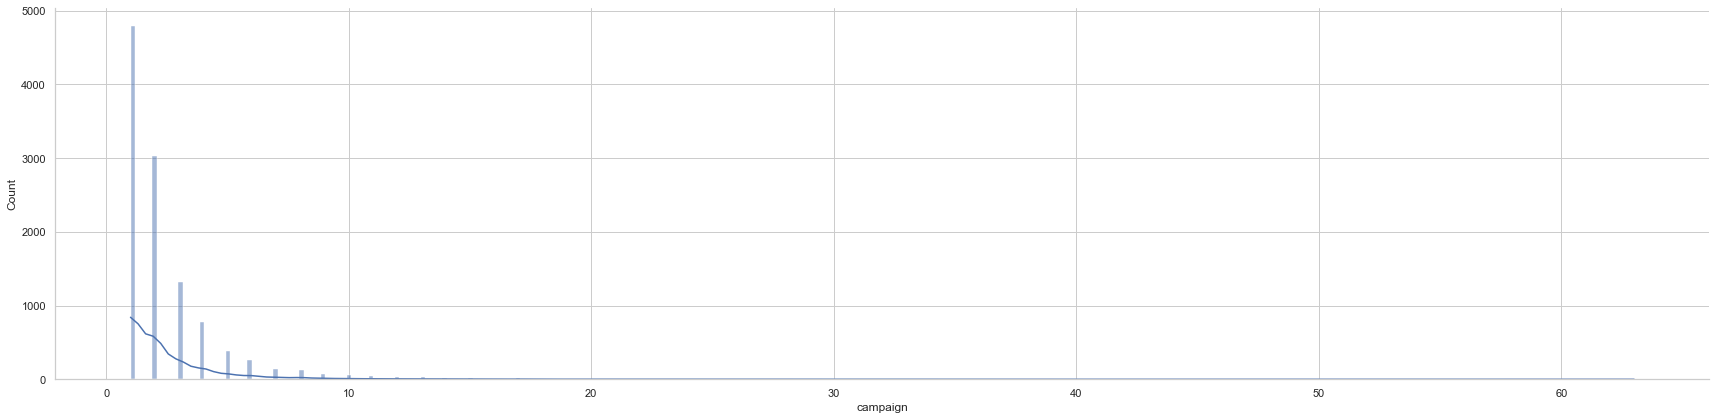

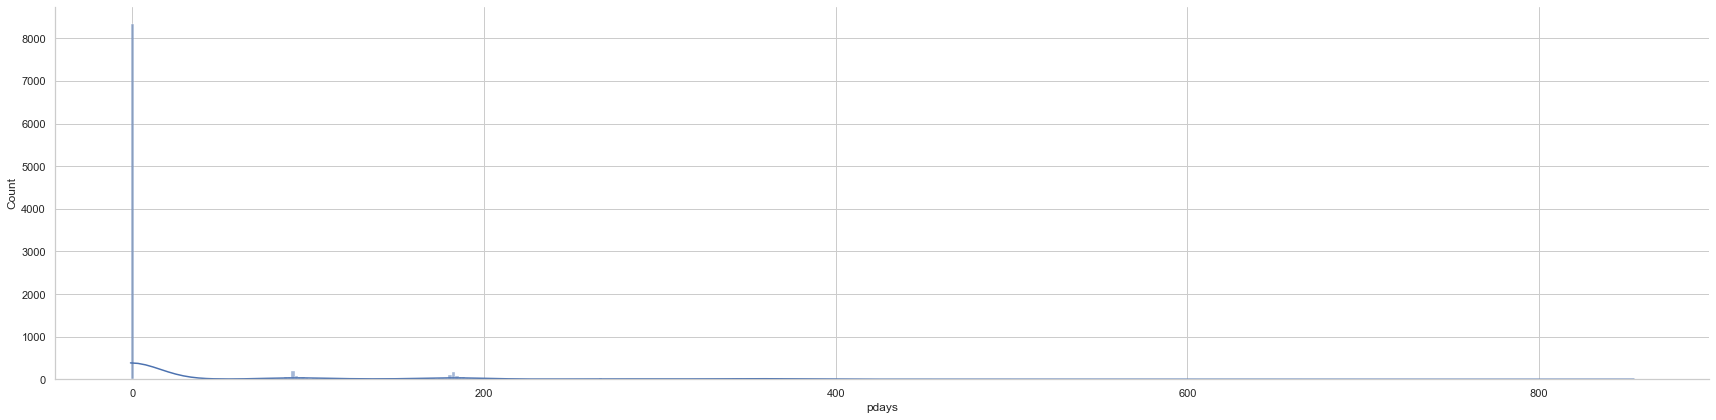

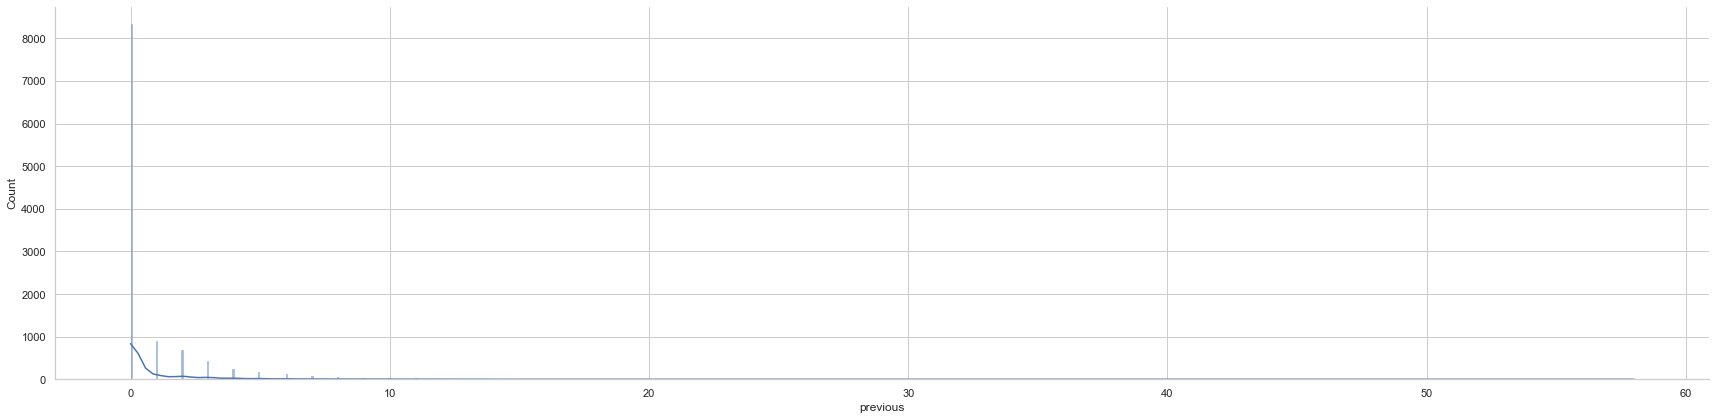

In [97]:
num_data = ["age", "balance", "duration", "campaign", "pdays", "previous"]

sns.set_theme(style = "whitegrid")

#fig, ax = plt.subplots(nrows = 6, ncols = 1, figsize = (5, 20))
#fig.subplots_adjust(hspace=.8)

for i, col_ in enumerate(num_data):
    ax = sns.displot(x=bank[col_], data=bank, kde = True,height = 6, aspect = 4)
    #ax[i].set_title("count of {}".format(col_))

## Variable analysis 

I will be evaluating the conversion rates of differnt segments that can be generated by given attributes.

Categorical columns are: 
* 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit'

Numeric columns are: 
* 'age', 'balance', 'duration', 'campaign', 'pdays' and 'previous'



### Categorical Data

In [98]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1


In [99]:
# write function to Segment and calculate proportion of deposit = 1

def convert_deposit(colu):
    dep = bank.groupby(colu)["deposit"].mean()
    return dep

In [104]:
# preview (job)
convert_deposit(bank["job"])

job
admin.           0.473013
blue-collar      0.364198
entrepreneur     0.375000
housemaid        0.397810
management       0.507015
retired          0.663239
self-employed    0.461728
services         0.399783
student          0.747222
technician       0.460779
unemployed       0.565826
unknown          0.485714
Name: deposit, dtype: float64

In [105]:
# write function to plot conversion by column for categorical data

def plot_var(var):
    sns.set_theme(style = "whitegrid")
    sns.despine()
    
    plt.figure(figsize=(12,5))
    data = convert_deposit(var).to_frame().reset_index()
    ax = sns.barplot(x=data['deposit'],
                  y=data[var].astype('category'), ci=95, orient = "h")
    ax.set_title('Conversion rate for "{}" attribute'.format(var))
    plt.xlim(0,1)

<Figure size 432x288 with 0 Axes>

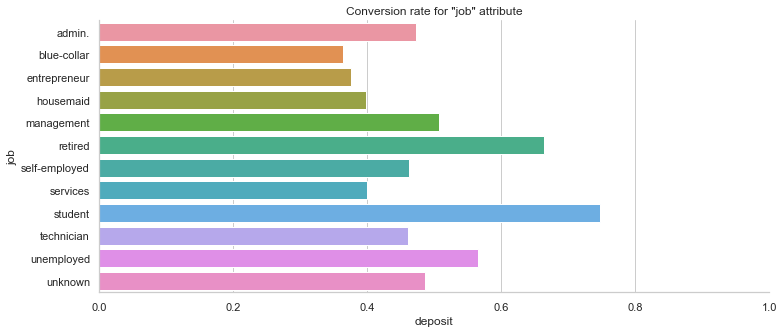

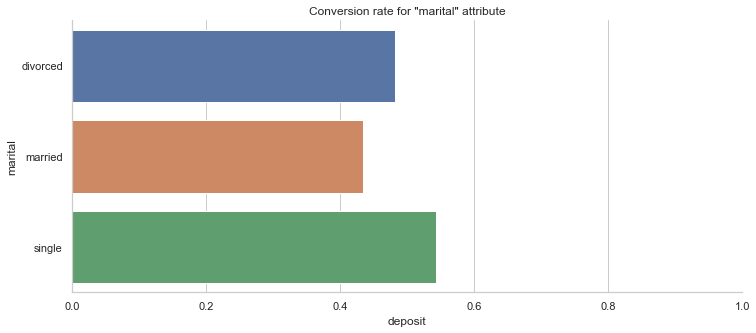

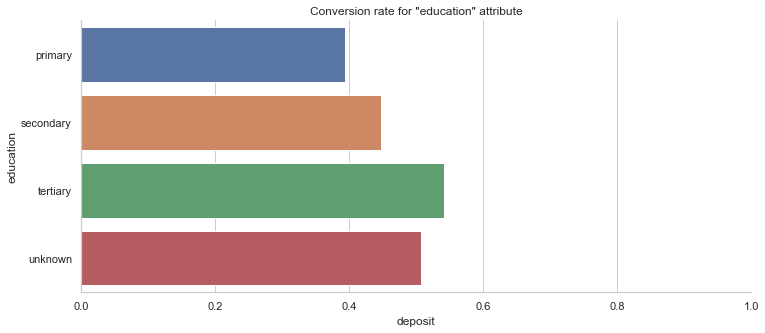

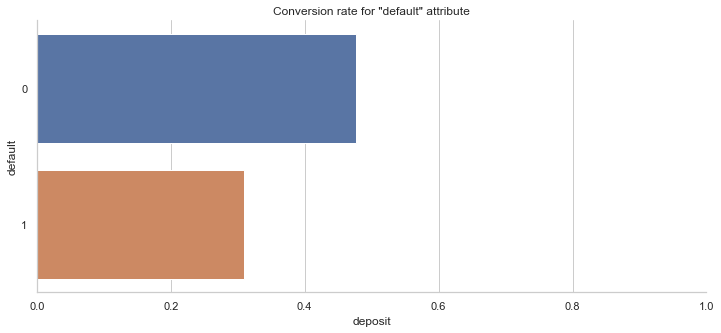

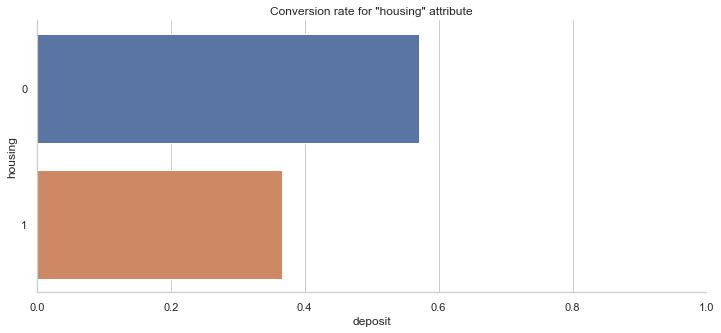

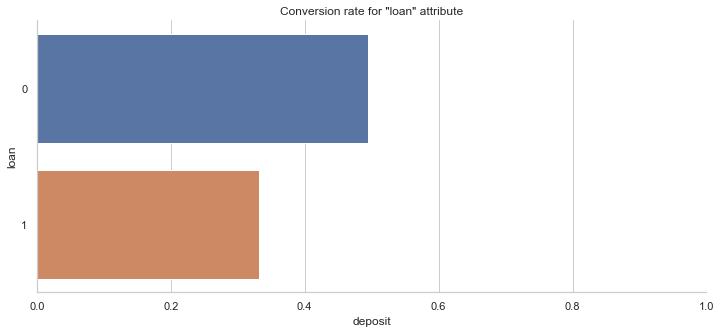

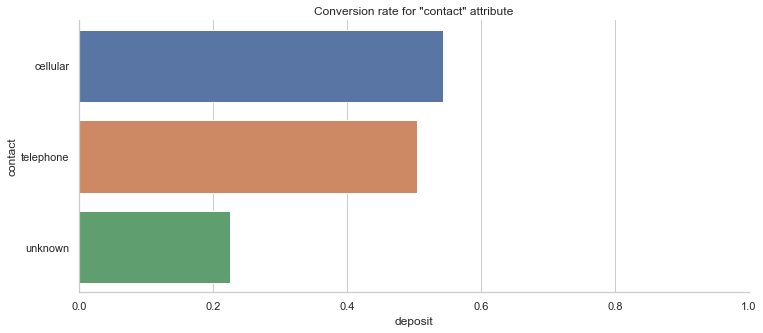

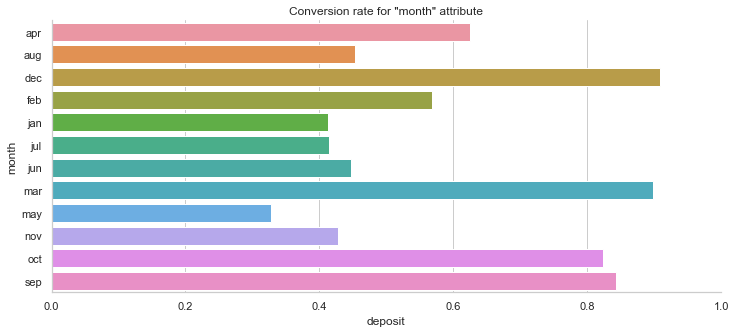

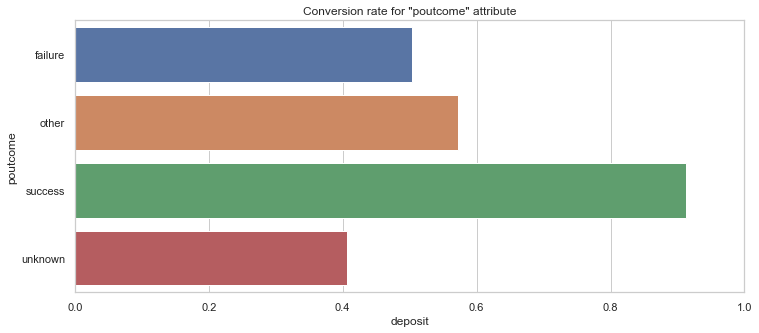

In [106]:
cat_data = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

for i in cat_data:
    plot_var(i)

I'm too damn lazy to start analyzing but it's self explainatory which category of each group has the highest conversion and one can infer or make decision on why.

T for thanks 

### Numerical Data

Numeric features include:
* 'age', 'balance', 'campaign', 'pdays' and 'previous'

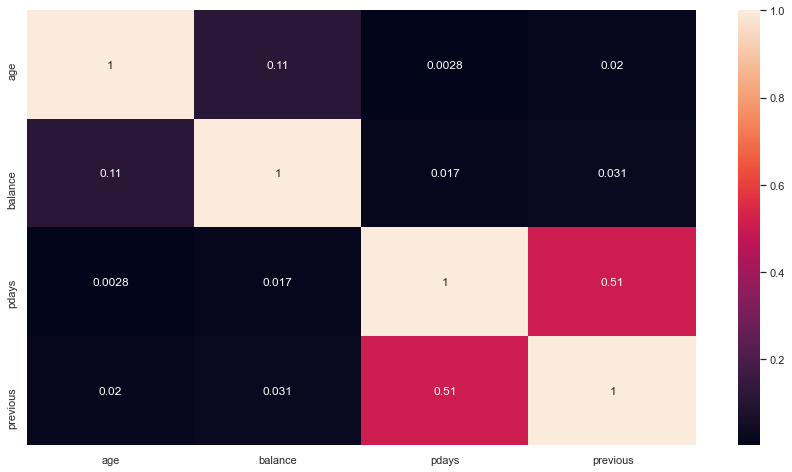

In [73]:
num_data = bank[["age", "balance", "pdays", "previous"]]

plt.figure(figsize = (15,8))
sns.heatmap(num_data.corr(), annot = True)

In [ ]:
# Create age grouping at 30 and 60
bank.loc[:, 'age_group'] = '<30'
bank.loc[(df['age'] >= 30)&(bank['age'] < 60), 'age_group'] = '30-60'
bank.loc[(df['age'] >= 60),'age_group'] = '>60'

In [77]:
# Create numeric groupings for balance
bank.loc[:,'balance_group'] = '<0'
bank.loc[(bank['balance'] >= 0)&(bank['balance'] < 1000), 'balance_group'] = '0-1000'
bank.loc[(bank['balance'] >= 1000)&(bank['balance'] < 2500), 'balance_group'] = '1000-2500'
bank.loc[(bank['balance'] >= 2500), 'balance_group'] = '2500+'

In [79]:
# assign categorical data for grouping contacts during campaign
bank.loc[:,'campaign_group'] = ''
bank.loc[bank['campaign'] == 1, 'campaign_group'] = '1'
bank.loc[(bank['campaign'] == 2) | (bank['campaign'] == 3), 'campaign_group'] = '2-3'
bank.loc[(bank['campaign'] > 3) & (bank['campaign'] <= 7), 'campaign_group'] = '4-7'
bank.loc[(bank['campaign'] > 7), 'campaign_group'] = '7+'

In [81]:
# label pdays into groups
bank.loc[:,'pdays_group'] = 4 
bank.loc[~(bank['pdays']== -1),'pdays_group'] = pd.qcut(bank.loc[~(bank['pdays'] == -1), 'pdays'], 4, labels=False)


In [82]:
# Convert previous into binary variable
bank.loc[:, 'previous_group'] = bank.loc[:, 'previous']
bank.loc[bank['previous_group']>0, 'previous_group'] = 1

<Figure size 432x288 with 0 Axes>

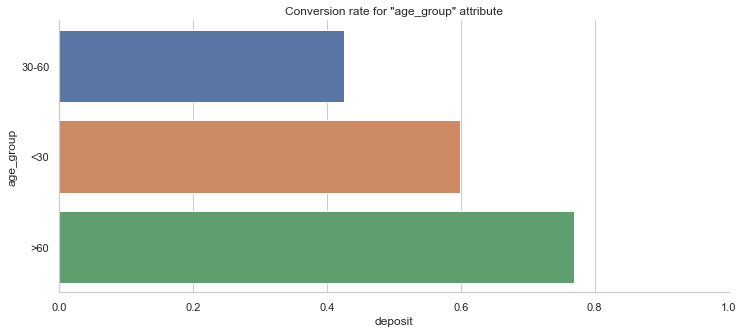

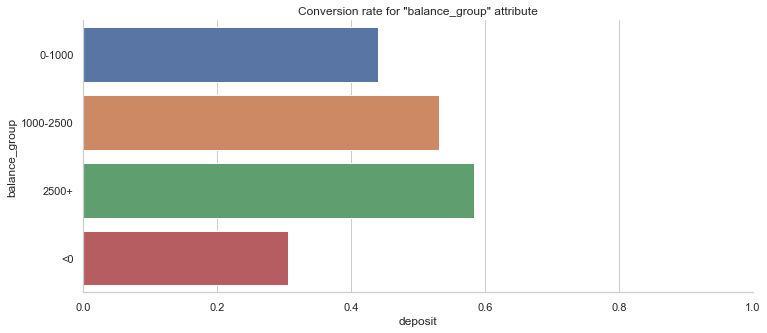

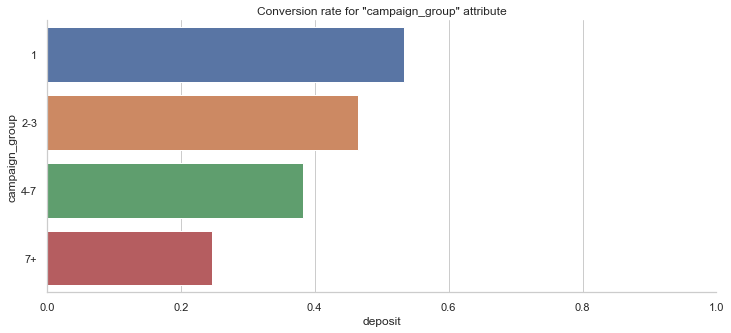

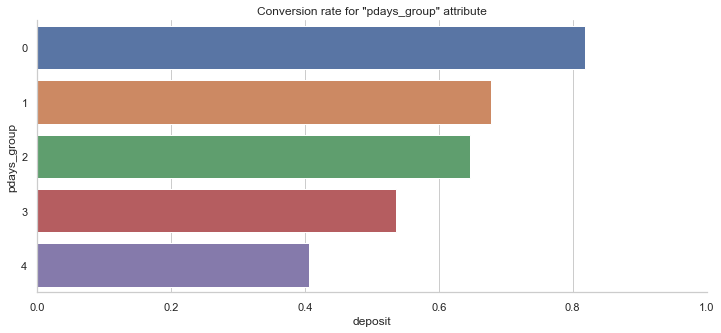

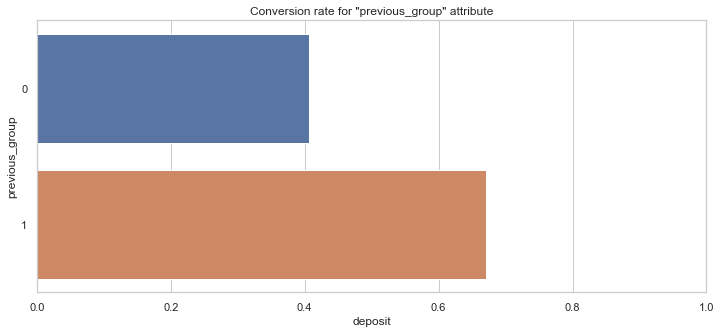

In [84]:
num_data = ['age_group', 'balance_group', 'campaign_group', 'pdays_group', 'previous_group']

for i in num_data:
    plot_var(i)